In [18]:
import pandas as pd
df = pd.read_excel('FlightDelays.xlsx', 'Data_for_Analysis')
df.shape

(2201, 13)

In [19]:
pip install pandas_ml

Note: you may need to restart the kernel to use updated packages.


In [20]:
df.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,2004-01-01,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,2004-01-01,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,2004-01-01,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,2004-01-01,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,2004-01-01,7792,IAD,0,4,1,N698BR,ontime


In [21]:
df.describe()

,CRS_DEP_TIME,DEP_TIME,DISTANCE,FL_NUM,Weather,DAY_WEEK,DAY_OF_MONTH
count,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000
mean,1371.938664,1369.298955,211.871422,3815.086324,0.014539,3.905498,16.024989
std,432.697149,442.462754,13.316815,2409.750224,0.119725,1.903149,8.677390
min,600.000000,10.000000,169.000000,746.000000,0.000000,1.000000,1.000000
25%,1000.000000,1004.000000,213.000000,2156.000000,0.000000,2.000000,8.000000
50%,1455.000000,1450.000000,214.000000,2385.000000,0.000000,4.000000,16.000000
75%,1710.000000,1709.000000,214.000000,6155.000000,0.000000,5.000000,23.000000
max,2130.000000,2330.000000,229.000000,7924.000000,1.000000,7.000000,31.000000


In [22]:
#check the balance of the categories in dependent variable
#This would give us the naive rule
df['Flight Status'].value_counts()

ontime     1773
delayed     428
Name: Flight Status, dtype: int64

In [23]:
#calculate proportions of the above
df['Flight Status'].value_counts()/df['Flight Status'].count()

ontime     0.805543
delayed    0.194457
Name: Flight Status, dtype: float64

In [24]:
X = df.loc[:, ['CARRIER', 'DAY_WEEK', 'Weather',
               'DEST', 'ORIGIN', 'CRS_DEP_TIME']]
y = pd.Categorical(df['Flight Status'], 
                   categories=['ontime', 'delayed'])
y = y.codes

In [25]:
#bin departure time
from scipy import stats
dept_time = df['CRS_DEP_TIME']
dep_time_bins=[659, 759, 859, 959, 1059, 1159, 1259, 1359, 1459, 1559, 1659, 1759, 1859, 1959, 2059]

#arguments: X, values, bins
statistic, bin_edges, dep_time_bin_number = stats.binned_statistic(
    dept_time, dept_time, bins=dep_time_bins)
X['CRS_DEP_TIME'] = dep_time_bin_number

In [26]:
#get dummies for categorical variables
X = pd.get_dummies(X, columns=['CARRIER', 
            'DEST', 'ORIGIN', 'CRS_DEP_TIME', 'DAY_WEEK'])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 38 columns):
Weather            2201 non-null int64
CARRIER_CO         2201 non-null uint8
CARRIER_DH         2201 non-null uint8
CARRIER_DL         2201 non-null uint8
CARRIER_MQ         2201 non-null uint8
CARRIER_OH         2201 non-null uint8
CARRIER_RU         2201 non-null uint8
CARRIER_UA         2201 non-null uint8
CARRIER_US         2201 non-null uint8
DEST_EWR           2201 non-null uint8
DEST_JFK           2201 non-null uint8
DEST_LGA           2201 non-null uint8
ORIGIN_BWI         2201 non-null uint8
ORIGIN_DCA         2201 non-null uint8
ORIGIN_IAD         2201 non-null uint8
CRS_DEP_TIME_0     2201 non-null uint8
CRS_DEP_TIME_1     2201 non-null uint8
CRS_DEP_TIME_2     2201 non-null uint8
CRS_DEP_TIME_3     2201 non-null uint8
CRS_DEP_TIME_4     2201 non-null uint8
CRS_DEP_TIME_5     2201 non-null uint8
CRS_DEP_TIME_6     2201 non-null uint8
CRS_DEP_TIME_7     2201 non-null ui

In [27]:
df['ORIGIN'].value_counts()

DCA    1370
IAD     686
BWI     145
Name: ORIGIN, dtype: int64

In [28]:
df['CRS_DEP_TIME'].value_counts()

1455    138
1300    109
1900     99
700      92
2120     90
1500     77
900      77
1700     74
840      62
1715     61
1245     61
1830     58
630      57
1030     56
1430     52
1630     51
1730     50
1530     50
1100     48
1400     46
2100     45
1600     45
800      40
2030     31
1240     31
850      31
1645     30
1230     28
930      28
1710     28
1800     27
1720     27
1640     27
830      26
600      26
1359     25
730      24
1610     24
1000     23
1200     22
640      22
2000     22
645      21
1525     21
1130     20
1930     20
1330     19
735      17
1040     15
1039      6
1515      5
1315      4
845       3
925       3
2130      2
759       2
1605      1
1520      1
1725      1
Name: CRS_DEP_TIME, dtype: int64

In [29]:
df['DAY_WEEK'].value_counts()

5    391
4    372
3    320
1    308
2    307
7    253
6    250
Name: DAY_WEEK, dtype: int64

In [30]:
X = X.drop(columns=['CARRIER_DH', 'CRS_DEP_TIME_7',
                  'ORIGIN_DCA', 'DEST_JFK', 'DAY_WEEK_5'])

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                  test_size = .1,
                                                  random_state=20, 
                                                    stratify=y )

In [32]:
# run 10-fold cross validation as well as use a 10% hold out set

from sklearn.model_selection import cross_val_predict
from pandas_ml import ConfusionMatrix
clf = LogisticRegression(random_state=2, solver='liblinear')
y_pred = cross_val_predict(clf, X_train, y_train, cv=10)
cm = ConfusionMatrix(y_train, y_pred)
print(cm)
cm.print_stats()

Predicted  False  True  __all__
Actual                         
False       1592     3     1595
True         357    28      385
__all__     1949    31     1980
population: 1980
P: 385
N: 1595
PositiveTest: 31
NegativeTest: 1949
TP: 28
TN: 1592
FP: 3
FN: 357
TPR: 0.07272727272727272
TNR: 0.9981191222570532
PPV: 0.9032258064516129
NPV: 0.8168291431503335
FPR: 0.0018808777429467085
FDR: 0.0967741935483871
FNR: 0.9272727272727272
ACC: 0.8181818181818182
F1_score: 0.1346153846153846
MCC: 0.22586123476577044
informedness: 0.07084639498432588
markedness: 0.7200549496019464
prevalence: 0.19444444444444445
LRP: 38.666666666666664
LRN: 0.9290201005025126
DOR: 41.62091503267973
FOR: 0.1831708568496665


In [33]:
#now lets test on our test set
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = ConfusionMatrix(y_test, y_pred)
print(cm)
cm.print_stats()

Predicted  False  True  __all__
Actual                         
False        178     0      178
True          37     6       43
__all__      215     6      221
population: 221
P: 43
N: 178
PositiveTest: 6
NegativeTest: 215
TP: 6
TN: 178
FP: 0
FN: 37
TPR: 0.13953488372093023
TNR: 1.0
PPV: 1.0
NPV: 0.827906976744186
FPR: 0.0
FDR: 0.0
FNR: 0.8604651162790697
ACC: 0.832579185520362
F1_score: 0.24489795918367346
MCC: 0.3398851331431648
informedness: 0.13953488372093026
markedness: 0.827906976744186
prevalence: 0.19457013574660634
LRP: inf
LRN: 0.8604651162790697
DOR: inf
FOR: 0.17209302325581396


C:\Users\Mitchell\anaconda3\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:330: RuntimeWarning: divide by zero encountered in double_scalars
  return(np.float64(self.TPR) / self.FPR)


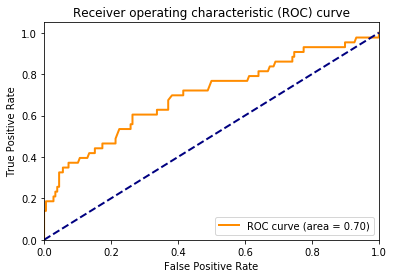

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_scores = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])#False positive rate and true positive rate values 
roc_auc = auc(fpr, tpr) # area under the curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') #naive rule
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [35]:
import numpy as np
coefficients = np.column_stack((X.columns, np.reshape(clf.coef_, -1))) #join column names and coeffcients
print('Coefficients: \n', coefficients)

Coefficients: 
 [['Weather' 3.2298629804752146]
 ['CARRIER_CO' 0.30337994993750456]
 ['CARRIER_DL' -0.5813492044611389]
 ['CARRIER_MQ' 0.3561614057430618]
 ['CARRIER_OH' -0.74884722657902]
 ['CARRIER_RU' -0.051030381569728354]
 ['CARRIER_UA' -0.42408847318676074]
 ['CARRIER_US' -0.9887669010567541]
 ['DEST_EWR' 0.04400996090722184]
 ['DEST_LGA' 0.15391439266092888]
 ['ORIGIN_BWI' 0.5874897806953562]
 ['ORIGIN_IAD' 0.31860203627418704]
 ['CRS_DEP_TIME_0' -0.12930866360774032]
 ['CRS_DEP_TIME_1' 0.10415073002683517]
 ['CRS_DEP_TIME_2' 0.0203014311433883]
 ['CRS_DEP_TIME_3' -0.6745767203832354]
 ['CRS_DEP_TIME_4' -0.22979930543055452]
 ['CRS_DEP_TIME_5' -0.0534353833859567]
 ['CRS_DEP_TIME_6' 0.0734865741164906]
 ['CRS_DEP_TIME_8' 0.5615281469188865]
 ['CRS_DEP_TIME_9' 0.7427559605884401]
 ['CRS_DEP_TIME_10' 0.26308172436840693]
 ['CRS_DEP_TIME_11' 0.5412763239686879]
 ['CRS_DEP_TIME_12' 0.22657553998956925]
 ['CRS_DEP_TIME_13' 1.013655797447888]
 ['CRS_DEP_TIME_14' 0.8201368002968059]
 [